https://aclanthology.org/2022.tacl-1.1/



In [5]:
# language_acquisition_analyzer.py

import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from typing import List, Dict, Tuple

class LinguisticFeatureTracker:
    def __init__(self):
        self.nlp = spacy.load('en_core_web_sm')
        self.syntax_patterns = defaultdict(int)
        self.semantic_roles = defaultdict(int)
        self.complexity_scores = []
        
    def analyze_syntax(self, text: str) -> Dict:
        doc = self.nlp(text)
        # Track dependency patterns
        deps = [(token.dep_, token.head.text) for token in doc]
        self.syntax_patterns[tuple(deps)] += 1
        # Calculate complexity
        tree_depth = max(len(list(token.ancestors)) for token in doc)
        return {
            'tree_depth': tree_depth,
            'unique_patterns': len(self.syntax_patterns)
        }
        
    def analyze_semantics(self, text: str) -> Dict:
        doc = self.nlp(text)
        # Track semantic roles and entities
        for ent in doc.ents:
            self.semantic_roles[ent.label_] += 1
        return {
            'unique_roles': len(self.semantic_roles),
            'entity_density': len(doc.ents) / len(doc)
        }

class AcquisitionAnalyzer:
    def __init__(self, window_size: int = 100):
        self.tracker = LinguisticFeatureTracker()
        self.window_size = window_size
        self.metrics_history = defaultdict(list)
        
    def process_batch(self, texts: List[str]) -> None:
        syntax_metrics = []
        semantic_metrics = []
        
        for i in range(0, len(texts), self.window_size):
            batch = texts[i:i+self.window_size]
            batch_text = ' '.join(batch)
            
            syntax = self.tracker.analyze_syntax(batch_text)
            semantics = self.tracker.analyze_semantics(batch_text)
            
            for k, v in {**syntax, **semantics}.items():
                self.metrics_history[k].append(v)
                
    def plot_acquisition_curves(self):
        plt.figure(figsize=(15, 8))
        for metric, values in self.metrics_history.items():
            plt.plot(values, label=metric)
        plt.xlabel('Training Steps')
        plt.ylabel('Metric Value')
        plt.title('Language Feature Acquisition Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()

In [7]:
def verify_spacy_model():
    """Verify spacy model is installed"""
    try:
        return spacy.load('en_core_web_sm')
    except OSError:
        print("Downloading required spacy model...")
        import subprocess
        subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"])
        return spacy.load('en_core_web_sm')

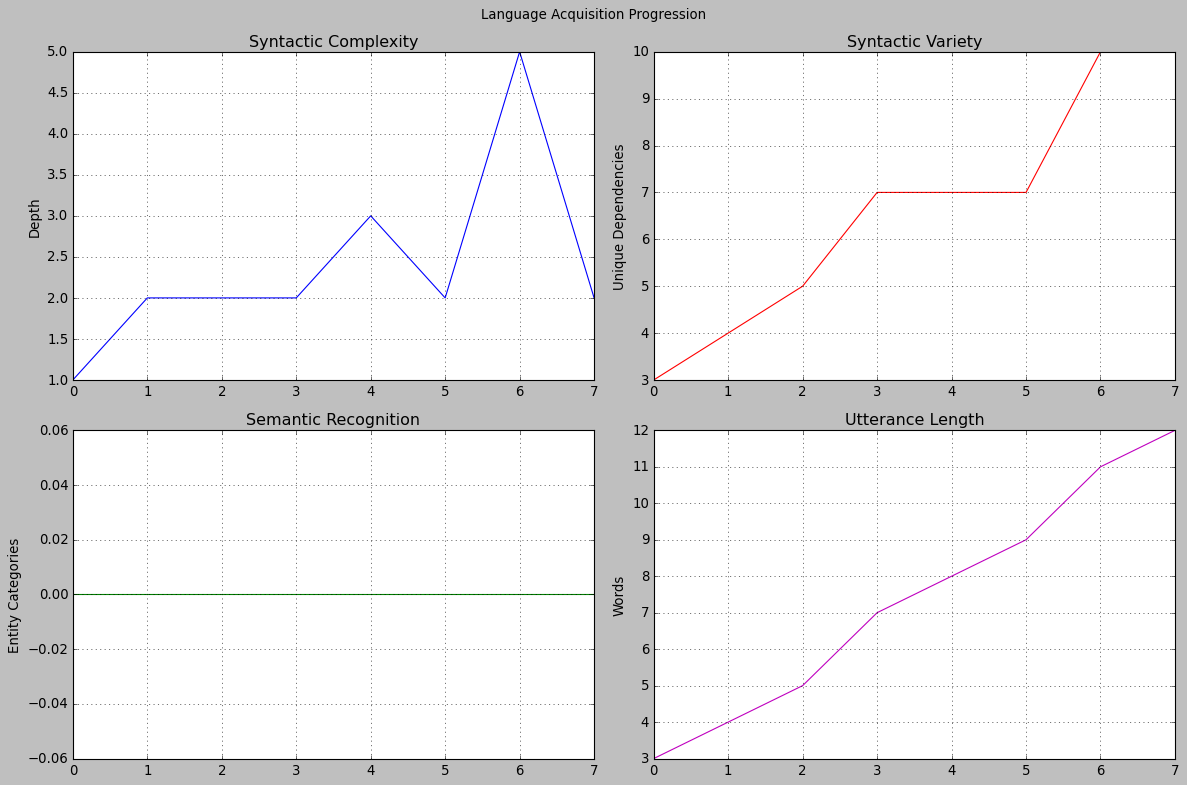


Final metrics:
tree_depth: 2
dep_types: 10
entity_types: 0
pos_variety: 9
length: 12


In [13]:
# language_analysis.py

import spacy
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

class LanguageAnalyzer:
    def __init__(self):
        self.nlp = spacy.load('en_core_web_sm')
        self.metrics = defaultdict(list)
        
    def analyze_sentence(self, text):
        doc = self.nlp(text)
        
        # Syntactic features
        depth = max(len(list(token.ancestors)) for token in doc)
        deps = set(token.dep_ for token in doc)
        
        # Semantic features
        entities = set(ent.label_ for ent in doc.ents)
        pos_tags = set(token.pos_ for token in doc)
        
        return {
            'tree_depth': depth,
            'dep_types': len(deps),
            'entity_types': len(entities),
            'pos_variety': len(pos_tags),
            'length': len(doc)
        }
    
    def process_sentences(self, sentences):
        for sent in sentences:
            metrics = self.analyze_sentence(sent)
            for key, value in metrics.items():
                self.metrics[key].append(value)
    
    def plot_results(self):
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Language Acquisition Progression')
        
        # Syntactic complexity
        axes[0,0].plot(self.metrics['tree_depth'], 'b-', label='Tree Depth')
        axes[0,0].set_title('Syntactic Complexity')
        axes[0,0].set_ylabel('Depth')
        axes[0,0].grid(True)
        
        # Dependency types
        axes[0,1].plot(self.metrics['dep_types'], 'r-', label='Dependency Types')
        axes[0,1].set_title('Syntactic Variety')
        axes[0,1].set_ylabel('Unique Dependencies')
        axes[0,1].grid(True)
        
        # Entity recognition
        axes[1,0].plot(self.metrics['entity_types'], 'g-', label='Entity Types')
        axes[1,0].set_title('Semantic Recognition')
        axes[1,0].set_ylabel('Entity Categories')
        axes[1,0].grid(True)
        
        # Sentence length
        axes[1,1].plot(self.metrics['length'], 'm-', label='Length')
        axes[1,1].set_title('Utterance Length')
        axes[1,1].set_ylabel('Words')
        axes[1,1].grid(True)
        
        plt.tight_layout()
        plt.savefig('language_acquisition.png')
        plt.show()

def main():
    sentences = [
        "Cat sits.",
        "The cat sits.",
        "The big cat sits.",
        "The big cat sits on mat.",
        "The big cat sits on the mat.",
        "If it rains, the cat sits inside.",
        "The big cat that I saw sits on the mat.",
        "Although it was raining, the cat decided to sit outside."
    ]
    
    analyzer = LanguageAnalyzer()
    analyzer.process_sentences(sentences)
    analyzer.plot_results()
    
    print("\nFinal metrics:")
    for metric, values in analyzer.metrics.items():
        print(f"{metric}: {values[-1]}")

if __name__ == "__main__":
    main()

Analyzing language acquisition patterns...

Plotting acquisition curves...


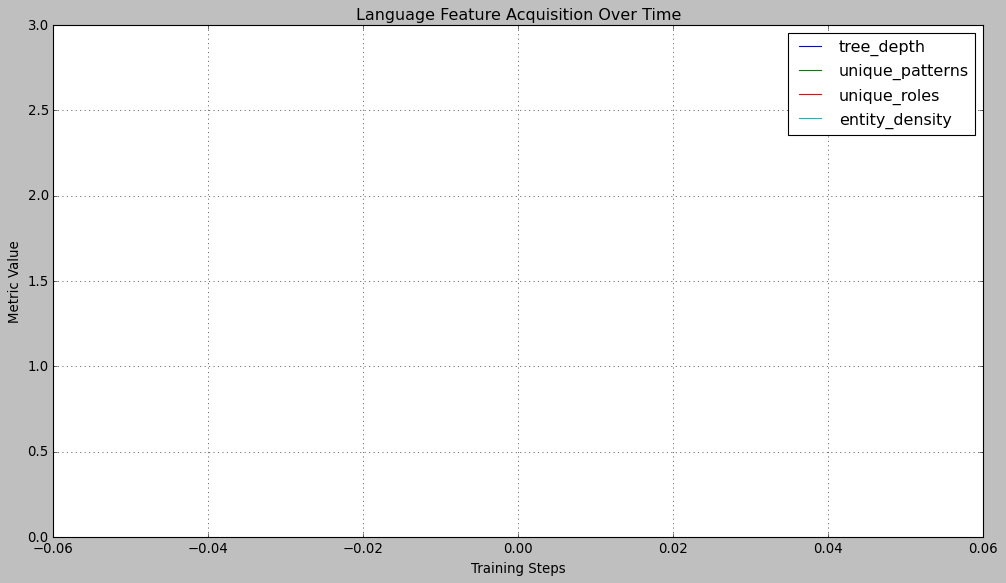


Summary of tracked features:
tree_depth: 3
unique_patterns: 1
unique_roles: 0
entity_density: 0.0


In [12]:
main()

Plan:
Modify code to analyze multiple models
Add comparison between models
Track acquisition patterns for each model
Visualize comparative results
Add statistical analysis


Processing gpt2...
Progress: 8/16
Processing bert...


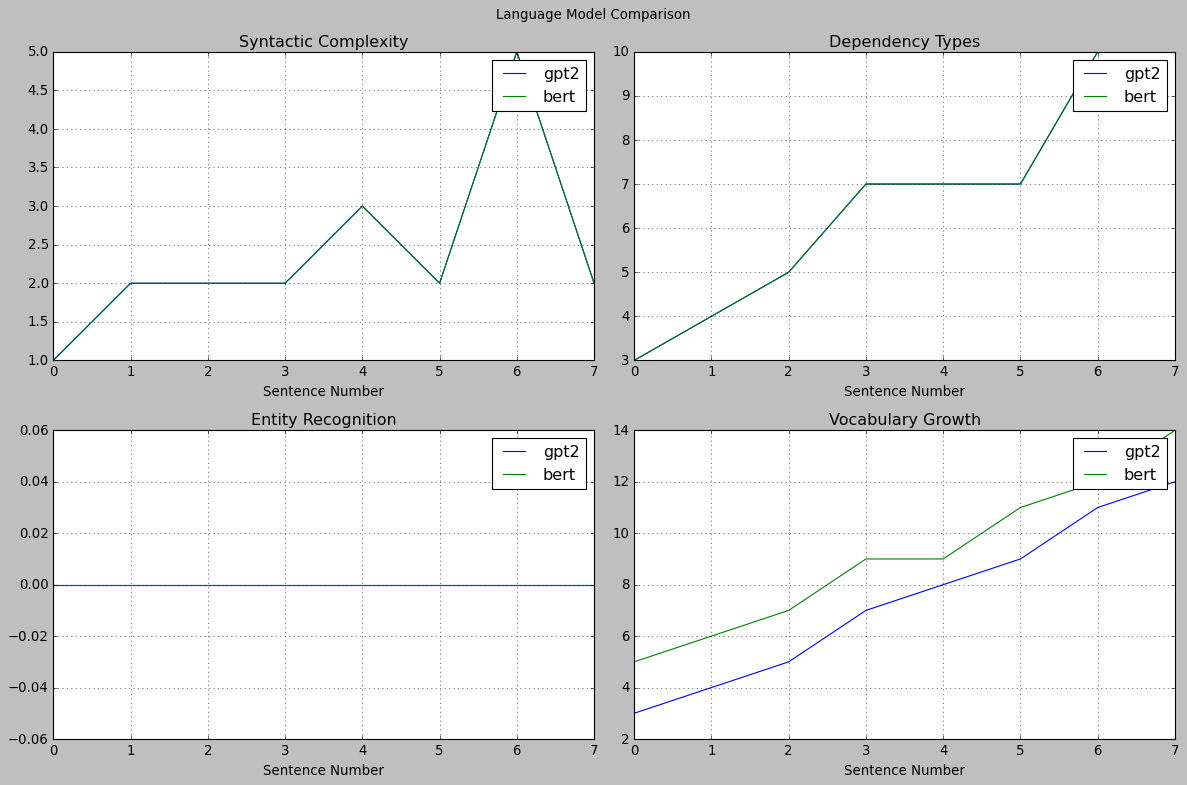

In [16]:
# model_comparison.py

import spacy
import numpy as np
import matplotlib.pyplot as plt
from transformers import (
    GPT2LMHeadModel, GPT2Tokenizer,
    BertModel, BertTokenizer
)
from collections import defaultdict
import torch

class ModelAnalyzer:
    def __init__(self):
        self.nlp = spacy.load('en_core_web_sm')
        # Limit to GPT-2 and BERT for simplicity
        self.models = {
            'gpt2': self._load_model('gpt2'),
            'bert': self._load_model('bert-base-uncased')
        }
        self.metrics = defaultdict(lambda: defaultdict(list))
        
    def _load_model(self, model_name):
        try:
            if 'gpt2' in model_name:
                model = GPT2LMHeadModel.from_pretrained(model_name)
                tokenizer = GPT2Tokenizer.from_pretrained(model_name)
            else:  # bert
                model = BertModel.from_pretrained(model_name)
                tokenizer = BertTokenizer.from_pretrained(model_name)
            return (model, tokenizer)
        except Exception as e:
            print(f"Error loading {model_name}: {e}")
            return None

    def analyze_model_output(self, text, model_name):
        if self.models[model_name] is None:
            return None
            
        model, tokenizer = self.models[model_name]
        doc = self.nlp(text)
        
        with torch.no_grad():
            # Syntactic analysis
            depth = max(len(list(token.ancestors)) for token in doc)
            deps = set(token.dep_ for token in doc)
            
            # Semantic analysis
            entities = set(ent.label_ for ent in doc.ents)
            tokens = tokenizer.encode(text)
            
            return {
                'tree_depth': depth,
                'dep_types': len(deps),
                'entity_types': len(entities),
                'vocab_size': len(set(tokens))
            }

    def process_sentences(self, sentences):
        total = len(sentences) * len(self.models)
        current = 0
        
        for model_name in self.models:
            if self.models[model_name] is None:
                continue
                
            print(f"\nProcessing {model_name}...")
            for sent in sentences:
                metrics = self.analyze_model_output(sent, model_name)
                if metrics:
                    for key, value in metrics.items():
                        self.metrics[model_name][key].append(value)
                current += 1
                print(f"Progress: {current}/{total}", end='\r')

    def plot_comparison(self):
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Language Model Comparison')
        
        metrics = ['tree_depth', 'dep_types', 'entity_types', 'vocab_size']
        titles = ['Syntactic Complexity', 'Dependency Types', 
                 'Entity Recognition', 'Vocabulary Growth']
        
        for idx, (metric, title) in enumerate(zip(metrics, titles)):
            ax = axes[idx//2, idx%2]
            for model_name in self.models:
                if model_name in self.metrics:
                    values = self.metrics[model_name][metric]
                    ax.plot(values, label=model_name)
            ax.set_title(title)
            ax.set_xlabel('Sentence Number')
            ax.grid(True)
            ax.legend()
        
        plt.tight_layout()
        plt.savefig('model_comparison.png')
        plt.show()

def main():
    sentences = [
        "Cat sits.",
        "The cat sits.",
        "The big cat sits.",
        "The big cat sits on mat.",
        "The big cat sits on the mat.",
        "If it rains, the cat sits inside.",
        "The big cat that I saw sits on the mat.",
        "Although it was raining, the cat decided to sit outside."
    ]
    
    analyzer = ModelAnalyzer()
    analyzer.process_sentences(sentences)
    analyzer.plot_comparison()

if __name__ == "__main__":
    main()